In [1]:
    import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dados de treinamento das máquinas
# Codificação: Alta=2, Média=1, Baixa=0
precisao = np.array([2, 1, 2, 1, 0, 0])  # Alta, Média, Alta, Média, Baixa, Baixa
velocidade = np.array([1, 0, 2, 2, 0, 1])  # Média, Baixa, Alta, Alta, Baixa, Média
retrabalho = np.array([0, 2, 0, 0, 2, 2])  # Baixa, Alta, Baixa, Baixa, Alta, Alta

In [3]:
# Classes: Alta Qualidade=1, Baixa Qualidade=0
classes = np.array(['Alta Qualidade', 'Baixa Qualidade', 'Alta Qualidade', 
                    'Alta Qualidade', 'Baixa Qualidade', 'Baixa Qualidade'])

In [4]:
# Combinar as características em uma matriz
X = np.column_stack((precisao, velocidade, retrabalho))

print("="*60)
print("CLASSIFICAÇÃO DE MÁQUINAS - ÁRVORE DE DECISÃO")
print("="*60)
print("\nDados de treinamento:")
print(f"Total de amostras: {len(classes)}")
print(f"\nDistribuição das classes:")
unique, counts = np.unique(classes, return_counts=True)
for classe, count in zip(unique, counts):
    print(f"  {classe}: {count}")

CLASSIFICAÇÃO DE MÁQUINAS - ÁRVORE DE DECISÃO

Dados de treinamento:
Total de amostras: 6

Distribuição das classes:
  Alta Qualidade: 3
  Baixa Qualidade: 3


In [5]:
# Dividir dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, classes, test_size=0.3, random_state=42
)

print(f"\nDados de treino: {len(X_treino)} amostras")
print(f"Dados de teste: {len(X_teste)} amostras")

# Criar e treinar o modelo
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_treino, y_treino)



Dados de treino: 4 amostras
Dados de teste: 2 amostras


DecisionTreeClassifier(random_state=42)

In [6]:
# Fazer previsões
previsoes = modelo.predict(X_teste)

print("\n" + "="*60)
print("RESULTADOS DO TESTE")
print("="*60)
print("\nPrevisões vs Valores Reais:")
for i, (real, prev) in enumerate(zip(y_teste, previsoes)):
    status = "✓" if real == prev else "✗"
    print(f"{status} Amostra {i+1}: Real={real}, Previsto={prev}")


RESULTADOS DO TESTE

Previsões vs Valores Reais:
✗ Amostra 1: Real=Alta Qualidade, Previsto=Baixa Qualidade
✓ Amostra 2: Real=Baixa Qualidade, Previsto=Baixa Qualidade


In [7]:
# Calcular métricas
acuracia = accuracy_score(y_teste, previsoes)
print(f"\n{'='*60}")
print("MÉTRICAS DE AVALIAÇÃO")
print("="*60)
print(f"Acurácia: {acuracia:.2%}")


MÉTRICAS DE AVALIAÇÃO
Acurácia: 50.00%


In [8]:
# Tentar calcular outras métricas (pode falhar com poucos dados)
try:
    precisao_metrica = precision_score(y_teste, previsoes, pos_label='Alta Qualidade')
    recall_metrica = recall_score(y_teste, previsoes, pos_label='Alta Qualidade')
    f1 = f1_score(y_teste, previsoes, pos_label='Alta Qualidade')
    
    print(f"Precisão: {precisao_metrica:.2%}")
    print(f"Recall: {recall_metrica:.2%}")
    print(f"F1-Score: {f1:.2%}")
except:
    print("\n(Métricas adicionais não disponíveis devido ao tamanho do dataset)")

Precisão: 0.00%
Recall: 0.00%
F1-Score: 0.00%


C:\Users\dsadm\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Gerando visualização da árvore de decisão...


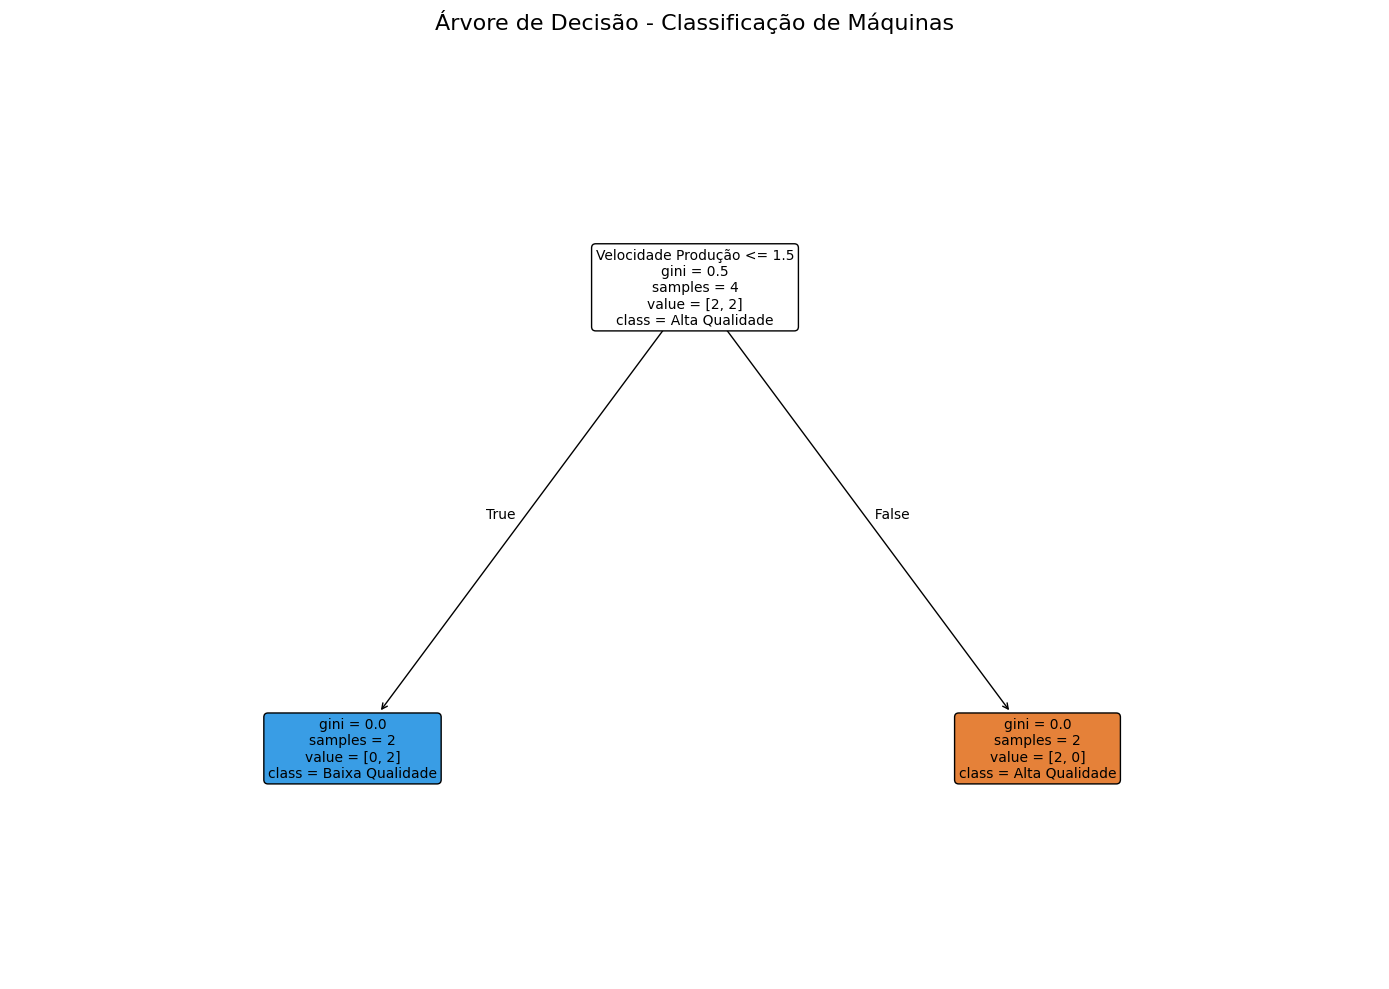

In [9]:
# Visualizar a árvore de decisão
print("\n" + "="*60)
print("Gerando visualização da árvore de decisão...")
print("="*60)

fig = plt.figure(figsize=(14, 10))
tree.plot_tree(modelo, 
               feature_names=['Precisão Montagem', 'Velocidade Produção', 'Taxa Retrabalho'],
               class_names=['Alta Qualidade', 'Baixa Qualidade'],
               filled=True,
               rounded=True,
               fontsize=10)
plt.title('Árvore de Decisão - Classificação de Máquinas', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [10]:
# Testar com novos dados
print("\n" + "="*60)
print("TESTE COM NOVAS MÁQUINAS")
print("="*60)


TESTE COM NOVAS MÁQUINAS


In [11]:
# Exemplos de novas máquinas para classificar
novos_dados = np.array([
    [2, 2, 0],  # Alta precisão, Alta velocidade, Baixo retrabalho
    [0, 0, 2],  # Baixa precisão, Baixa velocidade, Alto retrabalho
    [1, 1, 1],  # Média em tudo
])

novas_previsoes = modelo.predict(novos_dados)

print("\nClassificação de novas máquinas:")
caracteristicas = ['Alta/Alta/Baixa', 'Baixa/Baixa/Alta', 'Média/Média/Média']
for i, (dados, previsao) in enumerate(zip(caracteristicas, novas_previsoes)):
    print(f"Máquina {i+1} ({dados}): {previsao}")

print("\n" + "="*60)
print("Análise concluída!")
print("="*60)


Classificação de novas máquinas:
Máquina 1 (Alta/Alta/Baixa): Alta Qualidade
Máquina 2 (Baixa/Baixa/Alta): Baixa Qualidade
Máquina 3 (Média/Média/Média): Baixa Qualidade

Análise concluída!
